# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/craigbraganza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
)

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError as ae:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

columns = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[columns]

bitcoin_df = bitcoin_df.drop(columns=['date'])
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.2280,0.097,0.831,0.072,"Mr. Spiekers most prominent customer, whom he ..."
1,-0.2732,0.057,0.943,0.000,"You might have heard of crypto Twitter, the co..."
2,-0.4215,0.076,0.924,0.000,"Bitcoin hit a milestone Friday ""that gets the ..."
3,-0.1154,0.154,0.730,0.116,"Other fund vehicles hold crypto directly, but ..."
4,0.0000,0.000,1.000,0.000,"When Russia invaded Ukraine, Niki Proshin was ..."


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError as ae:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
    
columns = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[columns]
    
ethereum_df = ethereum_df.drop(columns=['date'])
ethereum_df.head()

,compound,negative,neutral,positive,text
0,-0.5106,0.102,0.898,0.000,Digital thieves just pulled off another major ...
1,-0.4215,0.098,0.851,0.051,"This week, the cryptocurrency network Ronin di..."
2,0.0000,0.000,1.000,0.000,His name is Vitalik Buterin and after dedicati...
3,0.7430,0.083,0.594,0.323,Regulatory solutions should be codified region...
4,0.8340,0.050,0.713,0.236,"If it sounds too good to be true, youre not wr..."


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.021925,0.05335,0.882350,0.064350
std,0.424476,0.06201,0.072058,0.052158
min,-0.771300,0.00000,0.730000,0.000000
25%,-0.284450,0.00000,0.846000,0.000000
50%,0.000000,0.04300,0.879500,0.070000
75%,0.369700,0.09250,0.926000,0.095750
max,0.636900,0.18700,1.000000,0.171000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.288310,0.022000,0.875700,0.102250
std,0.420041,0.036636,0.127389,0.110016
min,-0.510600,0.000000,0.594000,0.000000
25%,0.000000,0.000000,0.818750,0.000000
50%,0.286350,0.000000,0.897500,0.080000
75%,0.586700,0.048500,1.000000,0.177500
max,0.867600,0.102000,1.000000,0.323000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    sw = set(stopwords.words('english'))
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.2280,0.097,0.831,0.072,"Mr. Spiekers most prominent customer, whom he ...","[mr, spiekers, prominent, customer, described,..."
1,-0.2732,0.057,0.943,0.000,"You might have heard of crypto Twitter, the co...","[might, heard, crypto, twitter, corner, social..."
2,-0.4215,0.076,0.924,0.000,"Bitcoin hit a milestone Friday ""that gets the ...","[bitcoin, hit, milestone, friday, get, world, ..."
3,-0.1154,0.154,0.730,0.116,"Other fund vehicles hold crypto directly, but ...","[fund, vehicle, hold, crypto, directly, theyre..."
4,0.0000,0.000,1.000,0.000,"When Russia invaded Ukraine, Niki Proshin was ...","[russia, invaded, ukraine, niki, proshin, wa, ..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.5106,0.102,0.898,0.000,Digital thieves just pulled off another major ...,"[digital, thief, pulled, another, major, crypt..."
1,-0.4215,0.098,0.851,0.051,"This week, the cryptocurrency network Ronin di...","[week, cryptocurrency, network, ronin, disclos..."
2,0.0000,0.000,1.000,0.000,His name is Vitalik Buterin and after dedicati...,"[name, vitalik, buterin, dedicating, cover, re..."
3,0.7430,0.083,0.594,0.323,Regulatory solutions should be codified region...,"[regulatory, solution, codified, regionally, i..."
4,0.8340,0.050,0.713,0.236,"If it sounds too good to be true, youre not wr...","[sound, good, true, youre, wrong, yield, farmi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text_combined = " ".join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text_combined)
bitcoin_ngrams = ngrams(bitcoin_processed, n=2)

In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_text_combined = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text_combined)
ethereum_ngrams = ngrams(ethereum_processed, n=2)

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

    """Corrected N to equal 10, not 3"""

In [20]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top_10 = token_count(bitcoin_processed)
bitcoin_top_10

[('char', 20),
 ('bitcoin', 16),
 ('march', 10),
 ('reuters', 10),
 ('crypto', 7),
 ('week', 6),
 ('cryptocurrency', 5),
 ('salvador', 4),
 ('london', 4),
 ('wa', 3)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top_10 = token_count(ethereum_processed)
ethereum_top_10

[('char', 20),
 ('cryptocurrency', 7),
 ('past', 7),
 ('digital', 6),
 ('ha', 6),
 ('ethereum', 5),
 ('ronin', 4),
 ('blockchain', 4),
 ('year', 4),
 ('billion', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

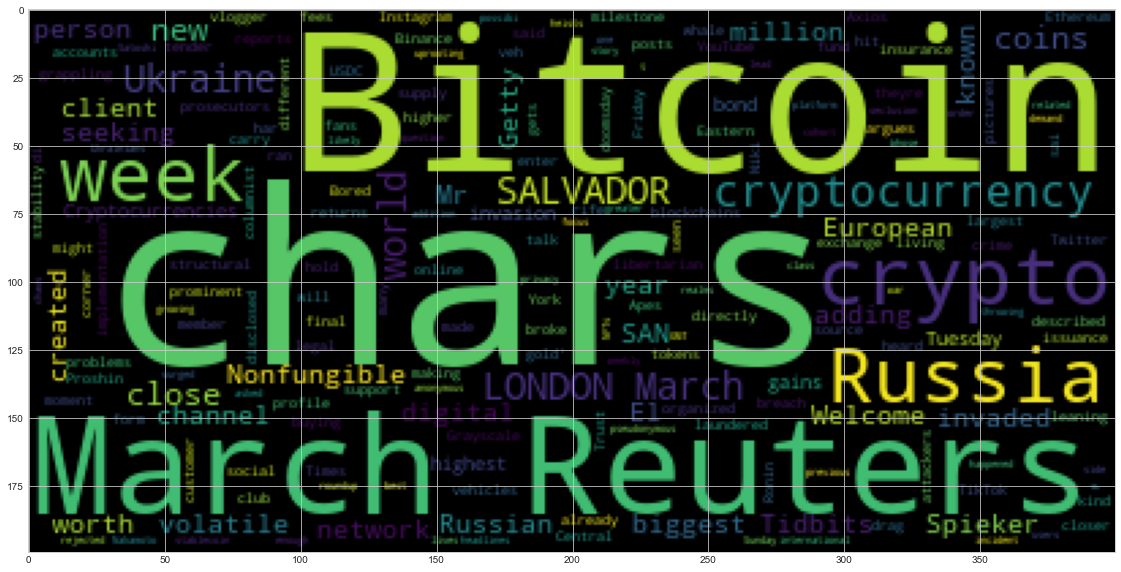

In [26]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc_bitcoin = WordCloud().generate(bitcoin_text_combined)
plt.imshow(wc_bitcoin)

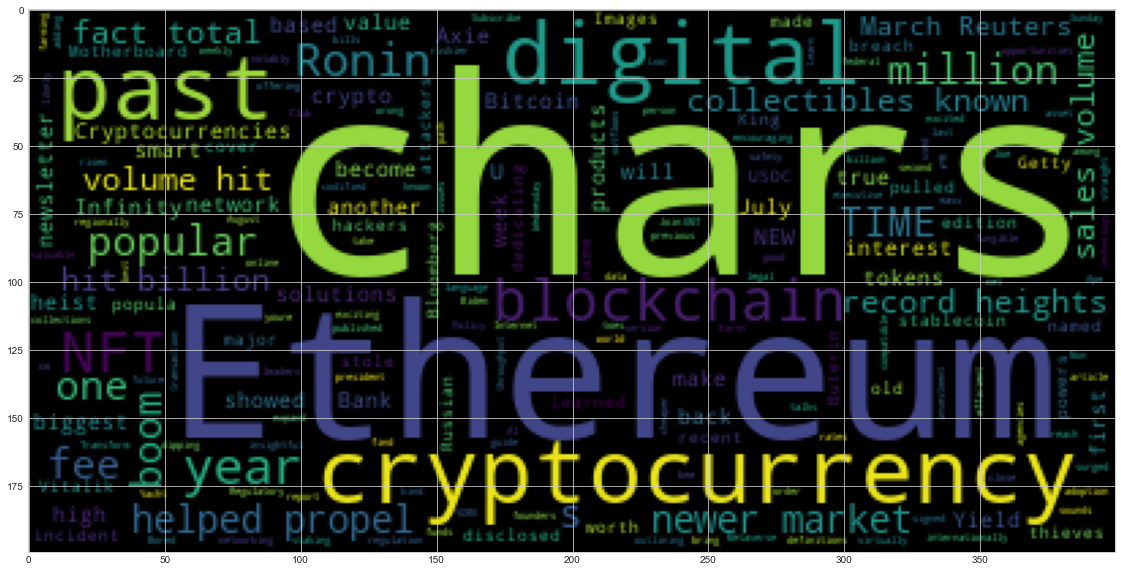

In [27]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_ethereum = WordCloud().generate(ethereum_text_combined)
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text_combined = ' '.join(bitcoin_df.text)

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(bitcoin_text_combined)

# Add a title to the document
# YOUR CODE HERE!
bitcoin_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [40]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_doc.ents:
    print(ent.text +" "+ ent.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Twitter PRODUCT
Bored Apes PERSON
Bitcoin PERSON
Friday DATE
Axios PERSON
19 million CARDINAL
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
SAN SALVADOR GPE
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
This week DATE
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
March 27 DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
March 22 DATE
Reuters ORG
Satoshi Nakamoto PERSON
2008 DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
LONDON GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
LONDON GPE
March 31 DATE
Reuters ORG
European Union ORG
Thursday DATE
March 29 DATE


---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text_combined = ' '.join(ethereum_df.text)

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_text_combined)

# Add a title to the document
# YOUR CODE HERE!
ethereum_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [37]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [39]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print(ent.text +" "+ ent.label_)

Digital ORG
Motherboard PERSON
173,600 CARDINAL
Ethereum ORG
about $591.2 million MONEY
Ronin ORG
Axie Infinity GPE
This week DATE
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
Vitalik Buterin PERSON
TIME ORG
Bloomberg GPE
Getty Images PERSON
28-year-old DATE
Russian NORP
Transform ORG
July 19 DATE
July 20 - August 3 DATE
6 MONEY
the last year DATE
Bored Ape Yacht Club ORG
one CARDINAL
Ethereum PERSON
the past few years DATE
NFT ORG
$24 billion MONEY
Joe Biden PERSON
Wednesday DATE
first ORDINAL
TIME ORG
weekly DATE
March 27 DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
NEW YORK GPE
March 21 DATE
Reuters ORG
a second straight week DATE
CoinShares ORG
Monday DATE
] JERUSALEM PERSON
March 24 DATE
Reuters ORG
Leumi PERSON
first ORDINAL
Israeli NORP
Pepper Invest ORG
Thursday DATE
U.S GPE
Ronin ORG
February 2021 DATE


---